**Percobaan 3 : Defuzzifikasi**

Berdasarkan aktivasi dari setiap fungsi keanggotaan yang telah diketahui. Maka aktivasi semua output tersebut harus digabungkan dengan menggunakan operator maksimum (Langkah tersebuh dinamakan agregasi). Kemudian untuk mendapatkan output sesuai dengan angka yang nyata (tidak fuzzy lagi) maka diperlukan proses Deffuzyfikasi.

In [ ]:
pip install -U scikit-fuzzy

     |████████████████████████████████| 993 kB 8.3 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=2e1c37d065ecbd9188f3599df3f311e6ae47e28669eba9dabcf2bcba9cba0ce7
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


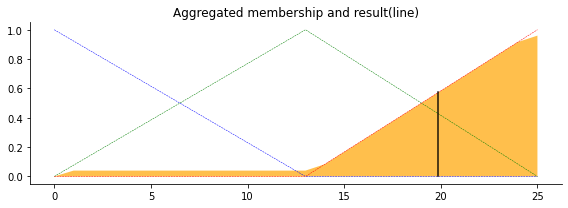

In [ ]:
#import libary
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

#variabel global
x_qual = np.arange(0, 11, 1)
x_serv = np.arange(0, 11, 1)
x_tip  = np.arange(0, 26, 1)

#membership function
qual_lo = fuzz.trimf(x_qual, [0, 0, 5])
qual_md = fuzz.trimf(x_qual, [0, 5, 10])
qual_hi = fuzz.trimf(x_qual, [5, 10, 10])

serv_lo = fuzz.trimf(x_serv, [0, 0, 5])
serv_md = fuzz.trimf(x_serv, [0, 5, 10])
serv_hi = fuzz.trimf(x_serv, [5, 10, 10])

tip_lo = fuzz.trimf(x_tip, [0, 0, 13])
tip_md = fuzz.trimf(x_tip, [0, 13, 25])
tip_hi = fuzz.trimf(x_tip, [13, 25, 25])

#pengujian fuzzy rules memberikan nilai 6.5 untuk kualitas makanan dan 9.8 untuk kualitas pelayanan
qual_level_lo = fuzz.interp_membership(x_qual, qual_lo, 6.5)
qual_level_md = fuzz.interp_membership(x_qual, qual_md, 6.5)
qual_level_hi = fuzz.interp_membership(x_qual, qual_hi, 6.5)

serv_level_lo = fuzz.interp_membership(x_serv, serv_lo, 9.8)
serv_level_md = fuzz.interp_membership(x_serv, serv_md, 9.8)
serv_level_hi = fuzz.interp_membership(x_serv, serv_hi, 9.8)

"""------------
Penerapan rules
------------"""
#rule 1
active_rule1 = np.fmax(qual_level_lo, serv_level_lo)
tip_activation_lo = np.fmin(active_rule1, tip_lo)

#rule 2
tip_activation_md = np.fmin(serv_level_md, tip_md)

#rule 3
active_rule3 = np.fmax(qual_level_hi, serv_level_hi)
tip_activation_hi = np.fmin(active_rule3, tip_hi)
tip0 = np.zeros_like(x_tip)

"""-----------------------------------------------------------------------------
1. Percobaan 3 ini berisi tentang proses deffuzyfikasi menggunakan 
metode centroid. Kode program berikut berisi tentang fungsi agregasi dari output 
yang telah disesuaikan dengan ke-3 rule yang ada. 
-----------------------------------------------------------------------------"""
aggregated = np.fmax(tip_activation_lo, np.fmax(tip_activation_md, tip_activation_hi))

"""-----------------------------------------------------------------------------
2. Kemudian dilanjutkan dengan Deffuzifikasi menggunakan metode centroid dengan 
kode program di bawah ini :
-----------------------------------------------------------------------------"""
tip = fuzz.defuzz(x_tip, aggregated, 'centroid')
tip_activation = fuzz.interp_membership(x_tip, aggregated, tip) #untuk plot

"""-----------------------------------------------------------------------------
3. Tahap yang terakhir adalah tahapan visualisasi dari hasil akhir untuk tip 
sebesar 20,2% dengan kode program berikut :
-----------------------------------------------------------------------------"""
fig, ax0 = plt.subplots(figsize=(8,3))

ax0.plot(x_tip, tip_lo, 'b', linewidth=0.5, linestyle='--')
ax0.plot(x_tip, tip_md, 'g', linewidth=0.5, linestyle='--')
ax0.plot(x_tip, tip_hi, 'r', linewidth=0.5, linestyle='--')
ax0.fill_between(x_tip, tip0, aggregated, facecolor='Orange', alpha=0.7)
ax0.plot([tip, tip], [0, tip_activation], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Aggregated membership and result(line)')

# mematikan/menghilangkan visual sumbu atas/kanan
for ax in (ax0, ):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()


# **Pertanyaan**

---

1.) Kenapa output yang dihasilkan pada percobaan 3 berumlah tiga output?

**Jawab:**
> *Karena dilakukan 3 tahap yaitu Fuzzyfikasi, Penerapan Fuzzy rule, dan Defuzzyfikasi*

2.) Jelaskan mengenai tata cara (step by step) penggabungan ketiga output tersebut!

**Jawab:**
> *Langkah pertama yaitu memberikan input nilai pada variabel yang akan diproses, lalu tiap variabelnya ditampilkan sebagai output. Selanjutnya pada langkah kedua melakukan penggabungan kedua grafik dari kedua variabel(kualitas makanan dan kualitas pelayanan) dengan menyesuaikan fuzzy rule yang telah ditetapkan. Kemudian pada langkah ketiga yaitu agregasi dimana melakukan aktivasi dari output (hasil dari langkah kedua), lalu digabungkan dengan menggunakan operator maksimum sehingga mendapatkan hasil akhir dari proses defuzzifikasi*
